In [18]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
#making a dataset

N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

# y = cos(2*x1) + cos(3*x2) 

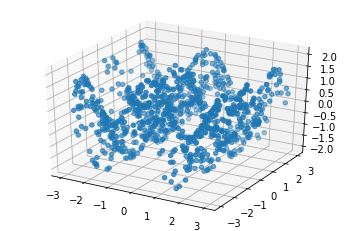

In [21]:
# plotting data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [0]:
# Building the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [0]:
# Compiling the model
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt,
              loss='mse')

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Training the model

r = model.fit(X,Y,
              epochs=100,
              metrics = ['accuracy'])

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9690
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9352
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9037
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8716
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8472
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7810
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7236
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6731
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6124
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5855
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6329
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5390
Epoch 13/100
32/32 [=================

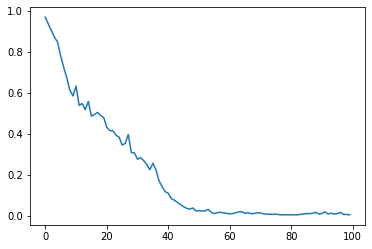

In [26]:
# Plotting the loss

plt.plot(r.history['loss'], label='loss')

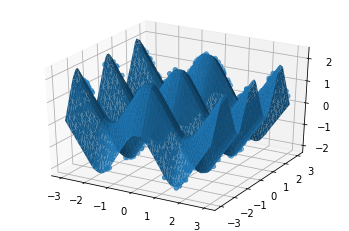

In [27]:
# Plotting the predictions

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)
xx,yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Y_pred = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Y_pred, linewidth=0.2, antialiased=True)
plt.show()

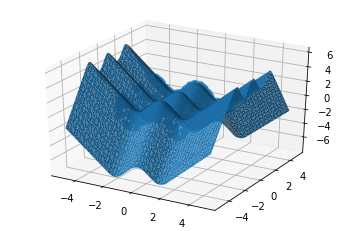

In [28]:
#Extending prediction

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line=np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Y_pred = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Y_pred, linewidth=0.2, antialiased=True)
plt.show()